# 1. Data Processing and Transformation

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import preprocessing libraries
from sklearn.preprocessing import StandardScaler

#Display all columns and rows in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Load the dataset from correlation_with_bankrupt.csv
file_path = '../data/raw/cleaned_data.csv'

#Load the dataset
df = pd.read_csv(file_path)

#Display the first 5 rows of the dataset
df.head()

,Net Income to Total Assets,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Debt ratio %,Net worth/Assets,Persistent EPS in the Last Four Seasons,Retained Earnings to Total Assets,Net profit before tax/Paid-in capital,Per Share Net profit before tax (Yuan ¥),Current Liability to Assets,Working Capital to Total Assets,Net Income to Stockholder's Equity,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Net Value Per Share (A),Net Value Per Share (B),Net Value Per Share (C),Current Liability to Equity,Current Liabilities/Equity,Working Capital/Equity,Operating Profit Per Share (Yuan ¥),Operating profit/Paid-in capital,Liability-Assets Flag,Total expense/Assets,Equity to Long-term Liability,CFO to Assets,Tax rate (A),Cash/Total Assets,Gross Profit to Sales,Operating Gross Margin,Bankrupt?
0,0.716845,0.424389,0.405750,0.370594,0.207576,0.792424,0.169141,0.903225,0.137757,0.138736,0.147308,0.672775,0.827890,0.390284,0.118250,0.290202,0.147950,0.147950,0.147950,0.339077,0.339077,0.721275,0.095921,0.095885,0,0.064856,0.126549,0.520382,0.0,0.004094,0.601453,0.601457,1
1,0.795297,0.538214,0.516730,0.464291,0.171176,0.828824,0.208944,0.931065,0.168962,0.169918,0.056963,0.751111,0.839969,0.376760,0.047775,0.283846,0.182251,0.182251,0.182251,0.329740,0.329740,0.731975,0.093722,0.093743,0,0.025516,0.120916,0.567101,0.0,0.014948,0.610237,0.610235,1
2,0.774670,0.499019,0.472295,0.426071,0.207516,0.792484,0.180581,0.909903,0.148036,0.142803,0.098162,0.829502,0.836774,0.379093,0.025346,0.290189,0.177911,0.177911,0.193713,0.334777,0.334777,0.742729,0.092338,0.092318,0,0.021387,0.117922,0.538491,0.0,0.000991,0.601449,0.601450,1
3,0.739555,0.451265,0.457733,0.399844,0.151465,0.848535,0.193722,0.906902,0.147561,0.148603,0.098715,0.725754,0.834697,0.379743,0.067250,0.281721,0.154187,0.154187,0.154187,0.331509,0.331509,0.729825,0.077762,0.077727,0,0.024161,0.120760,0.604105,0.0,0.018851,0.583538,0.583541,1
4,0.795016,0.538432,0.522298,0.465022,0.106509,0.893491,0.212537,0.913850,0.167461,0.168412,0.110195,0.751822,0.839973,0.375025,0.047725,0.278514,0.167502,0.167502,0.167502,0.330726,0.330726,0.732000,0.096898,0.096927,0,0.026385,0.110933,0.578469,0.0,0.014161,0.598782,0.598783,1


In [3]:
#Check the shape of the dataset
print("Shape of the dataset: ", df.shape)

#Check the columns of the dataset
print("\nColumns in the dataset:\n", df.columns)

Shape of the dataset:  (6819, 33)

Columns in the dataset:
 Index([' Net Income to Total Assets',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' ROA(C) before interest and depreciation before interest',
       ' Debt ratio %', ' Net worth/Assets',
       ' Persistent EPS in the Last Four Seasons',
       ' Retained Earnings to Total Assets',
       ' Net profit before tax/Paid-in capital',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Current Liability to Assets', ' Working Capital to Total Assets',
       ' Net Income to Stockholder's Equity', ' Borrowing dependency',
       ' Current Liability to Current Assets', ' Liability to Equity',
       ' Net Value Per Share (A)', ' Net Value Per Share (B)',
       ' Net Value Per Share (C)', ' Current Liability to Equity',
       ' Current Liabilities/Equity', ' Working Capital/Equity',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Operating prof

- We observe that there is an additional 'space' at the beginning of the column names. Need to fix that.

In [4]:
#Check the datatypes of the columns
print(f"Datatypes of the columns:\n{df.dtypes}")

Datatypes of the columns:
 Net Income to Total Assets                                 float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 ROA(C) before interest and depreciation before interest    float64
 Debt ratio %                                               float64
 Net worth/Assets                                           float64
 Persistent EPS in the Last Four Seasons                    float64
 Retained Earnings to Total Assets                          float64
 Net profit before tax/Paid-in capital                      float64
 Per Share Net profit before tax (Yuan ¥)                   float64
 Current Liability to Assets                                float64
 Working Capital to Total Assets                            float64
 Net Income to Stockholder's Equity                         float64
 Borrowing dependency                                       float64
 Current Liability to 

- All the columns have dtype "float64" except for: " Liability-Assets Flag" and "Bankrupt?" which is target variable.

In [5]:
#Printing the unique values in the column " Liability-Assets Flag"
print(f"Unique values in the column ' Liability-Assets Flag':\n{df[' Liability-Assets Flag'].unique()}")

Unique values in the column ' Liability-Assets Flag':
[0 1]


In [6]:
#Check for missing values in the dataset
print(f"Missing values in the dataset:\n{df.isnull().sum()}")

Missing values in the dataset:
 Net Income to Total Assets                                 0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 ROA(C) before interest and depreciation before interest    0
 Debt ratio %                                               0
 Net worth/Assets                                           0
 Persistent EPS in the Last Four Seasons                    0
 Retained Earnings to Total Assets                          0
 Net profit before tax/Paid-in capital                      0
 Per Share Net profit before tax (Yuan ¥)                   0
 Current Liability to Assets                                0
 Working Capital to Total Assets                            0
 Net Income to Stockholder's Equity                         0
 Borrowing dependency                                       0
 Current Liability to Current Assets                        0
 Liability to Equity                   

In [7]:
#Check for duplicate rows in the dataset
print(f"Duplicate rows in the dataset: {df.duplicated().sum()}")

Duplicate rows in the dataset: 0


In [8]:
#Summary statistics of the dataset
summary_statistics = df.describe()
summary_statistics.to_csv('../data/raw/summary_statistics.csv')

#Display the summary statistics from csv file
summary_statistics = pd.read_csv('../data/raw/summary_statistics.csv')
print(summary_statistics)

  Unnamed: 0   Net Income to Total Assets  \
0      count                  6819.000000   
1       mean                     0.807760   
2        std                     0.040332   
3        min                     0.000000   
4        25%                     0.796750   
5        50%                     0.810619   
6        75%                     0.826455   
7        max                     1.000000   

    ROA(A) before interest and % after tax  \
0                              6819.000000   
1                                 0.558625   
2                                 0.065620   
3                                 0.000000   
4                                 0.535543   
5                                 0.559802   
6                                 0.589157   
7                                 1.000000   

    ROA(B) before interest and depreciation after tax  \
0                                        6819.000000    
1                                           0.553589    
2       

Number of bankrupt and non-bankrupt companies:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Normalized value of bankrupt and non-bankrupt companies:
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


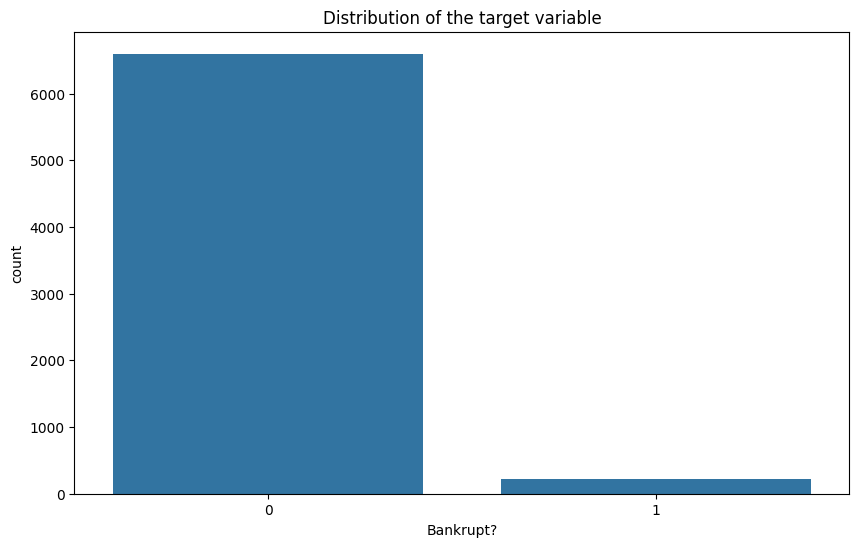

In [9]:
#Check the distribution of the target variable

#Count the number of bankrupt and non-bankrupt companies
bankrupt = df['Bankrupt?'].value_counts()
print(f"Number of bankrupt and non-bankrupt companies:\n{bankrupt}")

#Count the normalized value of bankrupt and non-bankrupt companies
bankrupt_normalized = df['Bankrupt?'].value_counts(normalize=True)
print(f"\nNormalized value of bankrupt and non-bankrupt companies:\n{bankrupt_normalized}")

#Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of the target variable')
plt.show()

- Only 3.2% of the values account to '1' that is 'Bankrupt companies' and rest 96.8% account to '0' that is 'Non-bankrupt companies'.
- We need to keep this imbalance of the target variable in mind during modeling phase.

In [10]:
#Checking for outliers in the dataset in a non-graphical way
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

#Display the number of outliers in each column
print(f"Number of outliers in each column:\n{outliers}")

#Display the percentage of outliers in each column
percentage_outliers = (outliers/df.shape[0])*100
print(f"\nPercentage of outliers in each column:\n{percentage_outliers}")

Number of outliers in each column:
 Net Income to Total Assets                                 561
 ROA(A) before interest and % after tax                     561
 ROA(B) before interest and depreciation after tax          432
 ROA(C) before interest and depreciation before interest    391
 Debt ratio %                                                30
 Net worth/Assets                                            30
 Persistent EPS in the Last Four Seasons                    508
 Retained Earnings to Total Assets                          633
 Net profit before tax/Paid-in capital                      476
 Per Share Net profit before tax (Yuan ¥)                   511
 Current Liability to Assets                                 95
 Working Capital to Total Assets                             75
 Net Income to Stockholder's Equity                         571
 Borrowing dependency                                       321
 Current Liability to Current Assets                        276
 Liab

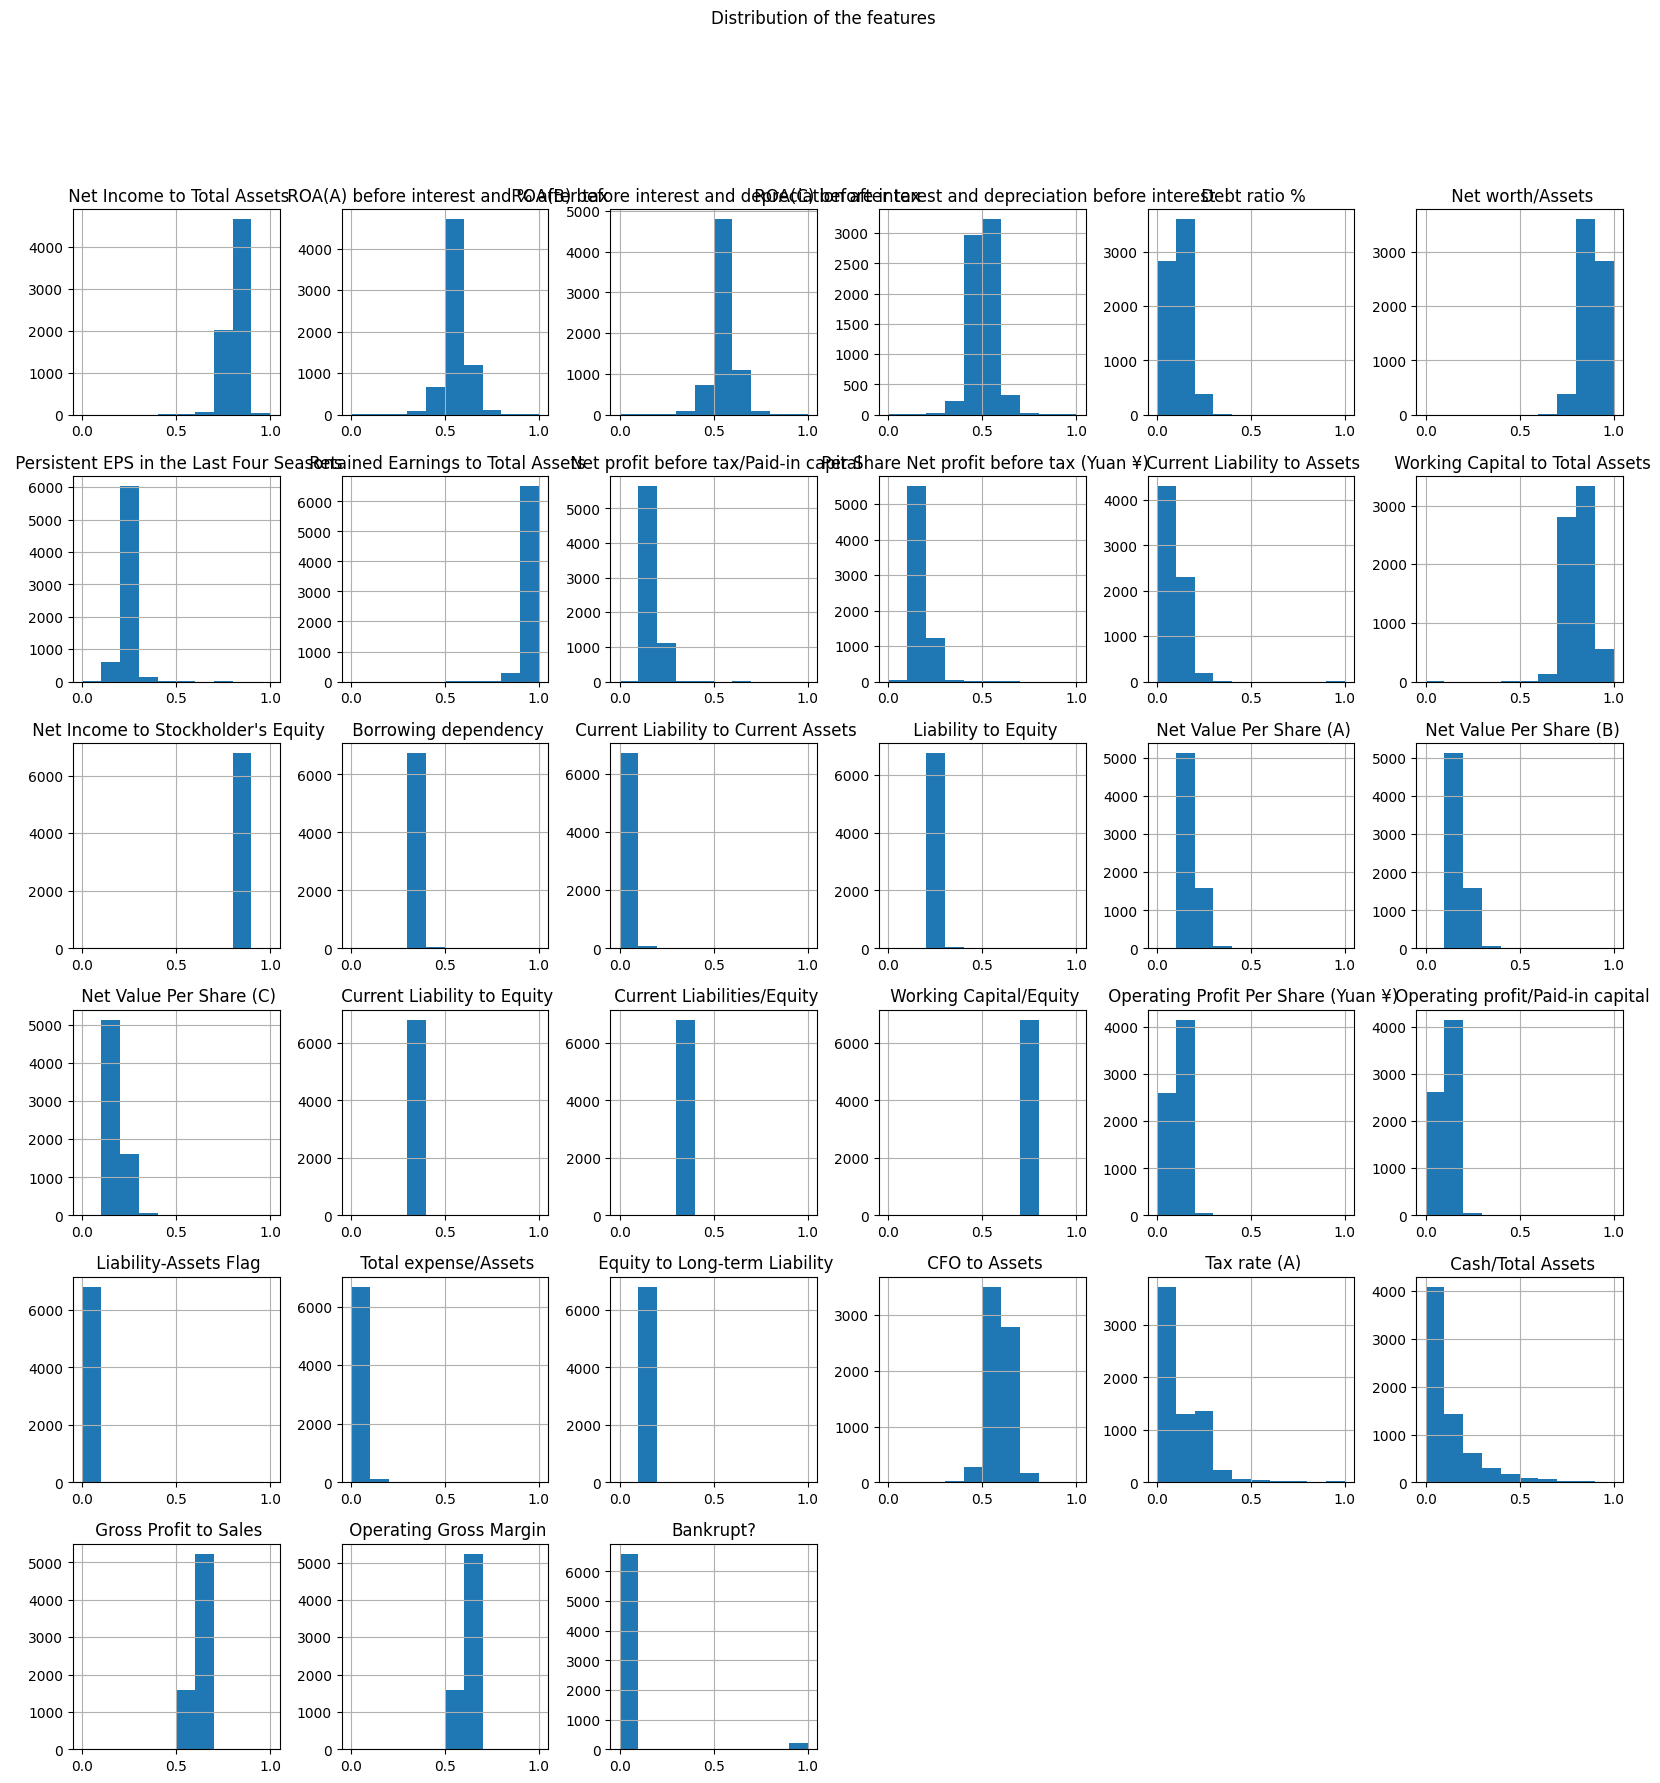

In [11]:
#Checking the distribution of the features using histograms
df.hist(figsize=(20, 20))
plt.suptitle('Distribution of the features')
plt.show()

In [12]:
#Checking for features with more than 5% outliers
features_above_5pct_outliers = percentage_outliers[percentage_outliers > 5]
print(f"Features with more than 5% outliers:\n{features_above_5pct_outliers}")

#Print the count of features with more than 5% outliers
print(f"\nNumber of features with more than 5% outliers: {len(features_above_5pct_outliers)}")

Features with more than 5% outliers:
Net Income to Total Assets                                 8.227013
ROA(A) before interest and % after tax                     8.227013
ROA(B) before interest and depreciation after tax          6.335240
ROA(C) before interest and depreciation before interest    5.733979
Persistent EPS in the Last Four Seasons                    7.449773
Retained Earnings to Total Assets                          9.282886
Net profit before tax/Paid-in capital                      6.980496
Per Share Net profit before tax (Yuan ¥)                   7.493767
Net Income to Stockholder's Equity                         8.373662
Liability to Equity                                        5.924622
Net Value Per Share (A)                                    6.804517
Net Value Per Share (B)                                    6.701862
Net Value Per Share (C)                                    6.819182
Current Liability to Equity                                7.039155
Current Lia

In [13]:
#Removing the outliers from the dataset
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [14]:
#Display the shape of the dataset after removing the outliers
print(f"Shape of the dataset after removing outliers: {df_no_outliers.shape}")

Shape of the dataset after removing outliers: (3985, 33)


In [15]:
#Check the distribution of the target variable after removing the outliers
print(f"Distribution of the target variable after removing the outliers:\n{df_no_outliers['Bankrupt?'].value_counts()}")

Distribution of the target variable after removing the outliers:
Bankrupt?
0    3985
Name: count, dtype: int64


- After removing outliers all the records with target variable '1' are removed. This means the records are not outliers but real life 'Bankruptcy' cases.
- Hence we need to consider all the records in the dataset for our modelling.

In [16]:
#Splitting the dataset into feature and target variables
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

#Standardizing the features
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)

In [17]:
#Display the shape of X_scaled and y
print(f"Shape of X_scaled: {X_scaled.shape}")
print(f"Shape of y: {y.shape}")

Shape of X_scaled: (6819, 32)
Shape of y: (6819,)


In [18]:
#Display the first 5 rows of the scaled feature variables
print(f"First 5 rows of the scaled features: \n{X_scaled.head()}")

First 5 rows of the scaled features: 
   Net Income to Total Assets  ROA(A) before interest and % after tax  \
0                   -2.254317                               -2.045798   
1                   -0.309033                               -0.311068   
2                   -0.820510                               -0.908420   
3                   -1.691222                               -1.636209   
4                   -0.316008                               -0.307745   

   ROA(B) before interest and depreciation after tax  \
0                                          -2.400361   
1                                          -0.598450   
2                                          -1.319910   
3                                          -1.556340   
4                                          -0.508050   

   ROA(C) before interest and depreciation before interest  Debt ratio %  \
0                                          -2.217909            1.750845   
1                                 

In [19]:
#Save the scaled features to a csv file
X_scaled.to_csv('../data/raw/scaled_features.csv', index=False)

# 2. Feature Engineering and Selection

In [ ]:
#Create polynomial features
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False).set_output(transform='pandas')
X_poly = poly.fit_transform(X_scaled)

#Display the shape of the dataset after creating polynomial features
print(f"Shape of the dataset after creating polynomial features: {X_poly.shape}")

#Display the first 5 rows of the dataset after creating polynomial features
print(f"First 5 rows of the dataset after creating polynomial features: \n{X_poly.head()}")

In [21]:
#Save the polynomial features to a csv file
X_poly.to_csv('../data/raw/polynomial_features.csv', index=False)

In [ ]:
#Import OLS from statsmodels
import statsmodels.api as sm

#Add a constant to the dataset
X_poly = sm.add_constant(X_poly)

#Checking the indices of X_poly are aligned with y_no_outliers
print(f"Are the indices of X_poly aligned with target: {X_poly.index.equals(y.index)}")

## 2A. VIF

In [ ]:
#Making a Variance Inflation check on X_poly and X_scaled
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a copy of X_poly
X_poly_copy = X_poly.copy()

#Add a constant to the dataset
X_poly_copy = sm.add_constant(X_poly_copy)

#Eliminating features based on VIF
vif = pd.DataFrame()
vif["Features"] = X_poly_copy.columns
vif["VIF"] = [variance_inflation_factor(X_poly_copy.values, i) for i in range(X_poly_copy.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

#Display the features and their VIF values
print(f"Features and their VIF values:\n{vif}")

#Drop the features with VIF greater than 10
X_poly_copy = X_poly_copy.drop(columns=vif[vif['VIF'] > 10]['Features'])

#Display the shape of the dataset after dropping features with VIF greater than 10
print(f"Shape of the dataset after dropping features with VIF greater than 10: {X_poly_copy.shape}")

In [ ]:
#Display the features of X_poly_copy dataset after dropping features with VIF greater than 10
print(f"Features of X_poly_copy dataset after dropping features with VIF greater than 10:\n{X_poly_copy.columns}")

In [27]:
#Save the dataset after dropping features with VIF greater than 10 to a csv file
X_poly_copy.to_csv('../data/raw/vif_features.csv', index=False)

## 2B. PCA

In [ ]:
#PCA for dimensionality reduction
from sklearn.decomposition import PCA

#Create a PCA object
pca = PCA(n_components=0.95).set_output(transform="pandas")

#Fit the PCA object to the scaled features
X_pca = pca.fit_transform(X_poly)

#Display the shape of the dataset after PCA
print(f"Shape of the dataset after PCA: {X_pca.shape}")

#Display the first 5 rows of the dataset after PCA
print(f"First 5 rows of the dataset after PCA: \n{X_pca.head()}")

In [29]:
#Save the dataset after PCA to a csv file
X_pca.to_csv('../data/raw/pca_features.csv', index=False)

## 2C. RFE

In [30]:
#RFE for feature selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

#Create a RFE object
rfecv = RFECV(estimator=logreg, 
              step=1, 
              cv=StratifiedKFold(5), 
              scoring='recall'
              ).set_output(transform="pandas")

In [ ]:
#RFE on X_scaled
X_rfecv_scaled = rfecv.fit_transform(X_scaled, y)

#Get the optimal number of features
optimal_num_features_scaled = rfecv.n_features_
print(f"Optimal number of features: {optimal_num_features_scaled}")

#Get the selected features
selected_features_scaled = rfecv.support_
print(f"Selected features: {selected_features_scaled}")

In [ ]:
#Display the shape of the dataset after RFE
print(f"Shape of the dataset after RFE: {X_rfecv_scaled.shape}")

#Display the selected features after RFE
print(f"Selected features after RFE: \n{X_rfecv_scaled.columns}")

In [33]:
#Save the dataset after RFE to a csv file
X_rfecv_scaled.to_csv('../data/raw/rfe_features.csv', index=False)

In [34]:
#Save target variable to a csv file
y.to_csv('../data/raw/target_variable.csv', index=False)

# 3. Feature Selection for scaled dataset without Polynomial features (interaction effect)

## 3A. VIF

In [21]:
#Making a Variance Inflation check on X_poly and X_scaled
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a copy of X_poly
X_scaled_copy = X_scaled.copy()

#Add a constant to the dataset
X_scaled_copy = sm.add_constant(X_scaled_copy)

#Eliminating features based on VIF
vif_new = pd.DataFrame()
vif_new["Features"] = X_scaled_copy.columns
vif_new["VIF"] = [variance_inflation_factor(X_scaled_copy.values, i) for i in range(X_scaled_copy.shape[1])]
vif_new = vif_new.sort_values(by='VIF', ascending=False)

#Display the features and their VIF values
print(f"Features and their VIF values:\n{vif_new}")

#Drop the features with VIF greater than 10
X_scaled_copy = X_scaled_copy.drop(columns=vif_new[vif_new['VIF'] > 10]['Features'])

#Display the shape of the dataset after dropping features with VIF greater than 10
print(f"Shape of the dataset after dropping features with VIF greater than 10: {X_scaled_copy.shape}")

#Display the features of X_poly_copy dataset after dropping features with VIF greater than 10
print(f"Features of X_poly_copy dataset after dropping features with VIF greater than 10:\n{X_scaled_copy.columns}")

#Save the dataset after dropping features with VIF greater than 10 to a csv file
X_scaled_copy.to_csv('../data/features_without_interactions/vif_features_new.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features and their VIF values:
                                             Features           VIF
5                                        Debt ratio %           inf
6                                    Net worth/Assets           inf
31                              Gross Profit to Sales  5.733448e+06
32                             Operating Gross Margin  1.809191e+06
21                         Current Liabilities/Equity  2.447713e+05
20                        Current Liability to Equity  2.447713e+05
17                            Net Value Per Share (A)  3.866514e+03
19                            Net Value Per Share (C)  3.075102e+03
18                            Net Value Per Share (B)  7.741161e+02
24                   Operating profit/Paid-in capital  4.626494e+02
23                Operating Profit Per Share (Yuan ¥)  4.605786e+02
16                                Liability to Equity  4.166035e+02
3    ROA(B) before interest and depreciation after...  9.731565e+01
4    ROA(C) befor

## 3B. PCA

In [22]:
#PCA for dimensionality reduction
from sklearn.decomposition import PCA

#Create a PCA object
pca_new = PCA(n_components=0.95).set_output(transform="pandas")

#Fit the PCA object to the scaled features
X_pca_new = pca_new.fit_transform(X_scaled)

#Display the shape of the dataset after PCA
print(f"Shape of the dataset after PCA: {X_pca_new.shape}")

#Display the first 5 rows of the dataset after PCA
print(f"First 5 rows of the dataset after PCA: \n{X_pca_new.head()}")

#Save the dataset after PCA to a csv file
X_pca_new.to_csv('../data/features_without_interactions/pca_features.csv', index=False)

Shape of the dataset after PCA: (6819, 13)
First 5 rows of the dataset after PCA: 
       pca0      pca1      pca2      pca3      pca4      pca5      pca6  \
0 -7.092179  0.993386  1.918296  1.226591  0.653435 -1.651970  0.296059   
1 -1.970947  0.043493  0.770380 -0.141617 -0.335920 -1.166766 -0.218929   
2 -3.687682 -0.029274  0.924293 -0.053569  0.726990  0.393089 -0.971571   
3 -5.154288 -0.606555  0.992931 -1.145734  0.340439 -0.467045  1.021938   
4 -2.161061 -0.573159  0.500939 -0.503500 -0.246326 -0.441941  0.376278   

       pca7      pca8      pca9     pca10     pca11     pca12  
0  0.397878 -0.950558 -0.135392  0.398071  0.932318 -0.792162  
1 -0.787099 -0.355022  0.295811  0.302777 -0.146681 -0.047302  
2 -1.492555  0.346306  0.111182  0.602270 -0.510888 -0.227613  
3  0.337562 -0.712165 -0.123785  0.874563  0.042238 -0.521328  
4  0.091956 -1.148521  0.122846 -0.144368 -0.076649 -0.021629  
